<center><h1>My Home Nutrition Analysis</h1><center>
<img src='https://www.fda.gov/files/nfl-howtounderstand-labeled.png' height=500 width=500 >

## Objective:

Over the past few years, I have started paying more attention to my nutrition since nutrition is a large part in maintaining a healthy lifestyle. With this analysis I want to observe how the nutrition of foods within my home varies. In addition to our household foods, I collected some nutritional data for fast food items we commonly enjoy.

### About The Data:

I collected the data by reading the nutrition fact labels on food items within my house. For nutrition on whole fruits and fast food items I took the nutrition from the company's web site. 

Each item contains its macronutrients and micronutrients with the measures given from the nutrition label. Some items contain a value of `0.99` which is a placeholder I used if the nutrition label said **'< 1g'**. Some items were given a value of zero in certain micronutrients where the micronutrient was labeled with a percentage as opposed to an actual measurement.

Not all of the foods in my house were used for this data, I mainly collected the nutrition facts for foods and drinks we regularly consume since there are some items in our pantry which never get touched.

**NOTE:**
I use the term **"Caution Zone"** to describe foods which I feel should should be consumed cautiously. This is not a definitive categorization since most foods can be consumed in moderation and just because an item did not meet the caution criteria does not mean it is exempt from moderation. The values for the cautious zones I used correspond to being 16-20% of my personal daily intake which I determined from a macronutrient calculator which is linked at the end of this notebook.


## Analysis

I will begin by importing the modules, importing the excel file with the data, and making sure there's no missing data or incorrect data types

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [65]:
df = pd.read_excel('https://github.com/a-camarillo/nutrition-analysis/blob/master/data/nutrition_facts.xlsx?raw=true')

In [66]:
df.head()

,Food Item,Category,Serving Size,Serving Measurement(grams),Calories,Total Fat(grams),Saturated Fat(grams),Trans Fat(grams),Polyunsaturated Fat(grams),Monounsaturated Fat(grams),...,Vitamin B6,Folate(micrograms,Folic Acid(micrograms),Vitamin A(micrograms),Vitamin C(milligrams),Vitamin E(milligrams),Zinc(milligrams),Vitamin B12(micrograms),Phosphorus(milligrams),Magnesium(milligrams)
0,Oroweat Whole Wheat Bread,Bread,1 Slice,38.0,100,1.0,0.0,0.0,0.5,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0
1,Cap'n Crunch Crunch Berries,Cereal,1 Cup,37.0,150,2.0,0.5,0.0,0.0,0.5,...,0.4,200,133,0.0,0.0,0.0,0.0,0.0,0,0
2,Cap'n Crunch,Cereal,1 Cup,38.0,150,2.0,0.5,0.0,0.0,0.5,...,0.4,200,134,0.0,0.0,0.0,0.0,0.0,0,0
3,Kellogg's Froot Loops,Cereal,1 1/3 Cup,39.0,150,1.5,0.5,0.0,0.0,0.0,...,0.0,0,45,0.0,0.0,0.0,0.0,0.0,0,0
4,Post Honey Bunches of Oats,Cereal,1 Cup,42.0,170,3.0,0.0,0.0,0.5,1.5,...,0.0,400,240,0.0,0.0,0.0,0.0,0.0,0,0


In [70]:
df.isna().sum()

Food Item                     0
Category                      0
Serving Size                  0
Serving Measurement(grams)    0
Calories                      0
Total Fat(grams)              0
Saturated Fat(grams)          0
Trans Fat(grams)              0
Polyunsaturated Fat(grams)    0
Monounsaturated Fat(grams)    0
Cholesterol(milligrams)       0
Sodium(milligrams)            0
Total Carbohydrates(grams)    0
Fiber(grams)                  0
Total Sugars(grams)           0
Added Sugars(grams)           0
Protein(grams)                0
Vitamin D(micrograms)         0
Calcium(milligrams)           0
Iron(milligrams)              0
Potassium(milligrams)         0
Thiamin(milligrams)           0
Riboflavin(milligrams)        0
Niacin(milligrams)            0
Vitamin B6                    0
Folate(micrograms             0
Folic Acid(micrograms)        0
Vitamin A(micrograms)         0
Vitamin C(milligrams)         0
Vitamin E(milligrams)         0
Zinc(milligrams)              0
Vitamin 

In [71]:
df.dtypes

Food Item                      object
Category                       object
Serving Size                   object
Serving Measurement(grams)    float64
Calories                        int64
Total Fat(grams)              float64
Saturated Fat(grams)          float64
Trans Fat(grams)              float64
Polyunsaturated Fat(grams)    float64
Monounsaturated Fat(grams)    float64
Cholesterol(milligrams)         int64
Sodium(milligrams)              int64
Total Carbohydrates(grams)      int64
Fiber(grams)                  float64
Total Sugars(grams)           float64
Added Sugars(grams)           float64
Protein(grams)                float64
Vitamin D(micrograms)         float64
Calcium(milligrams)             int64
Iron(milligrams)              float64
Potassium(milligrams)           int64
Thiamin(milligrams)           float64
Riboflavin(milligrams)        float64
Niacin(milligrams)            float64
Vitamin B6                    float64
Folate(micrograms               int64
Folic Acid(m

There are no missing values and all of the data types are as expected so now I'm going to do some quick cleaning of the column names to make things a little easier

In [72]:
"hide_cell"
df.columns = map(str.lower, df.columns)
df.columns = [column.replace(' ','_') for column in df.columns]
df.columns = [column.replace('(grams)','_g') for column in df.columns]
df.columns = [column.replace('(milligrams)','_mg') for column in df.columns]
df.columns = [column.replace('(micrograms)','_mcg') for column in df.columns]

In [73]:
"hide_cell"
df.columns

Index(['food_item', 'category', 'serving_size', 'serving_measurement_g',
       'calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g',
       'polyunsaturated_fat_g', 'monounsaturated_fat_g', 'cholesterol_mg',
       'sodium_mg', 'total_carbohydrates_g', 'fiber_g', 'total_sugars_g',
       'added_sugars_g', 'protein_g', 'vitamin_d_mcg', 'calcium_mg', 'iron_mg',
       'potassium_mg', 'thiamin_mg', 'riboflavin_mg', 'niacin_mg',
       'vitamin_b6', 'folate(micrograms', 'folic_acid_mcg', 'vitamin_a_mcg',
       'vitamin_c_mg', 'vitamin_e_mg', 'zinc_mg', 'vitamin_b12_mcg',
       'phosphorus_mg', 'magnesium_mg'],
      dtype='object')

In [74]:
"hide_cell"
#One more rename to deal with sneaky folate
df.rename(columns={'folate(micrograms':'folate_mcg'},inplace=True)

In [75]:
df.columns

Index(['food_item', 'category', 'serving_size', 'serving_measurement_g',
       'calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g',
       'polyunsaturated_fat_g', 'monounsaturated_fat_g', 'cholesterol_mg',
       'sodium_mg', 'total_carbohydrates_g', 'fiber_g', 'total_sugars_g',
       'added_sugars_g', 'protein_g', 'vitamin_d_mcg', 'calcium_mg', 'iron_mg',
       'potassium_mg', 'thiamin_mg', 'riboflavin_mg', 'niacin_mg',
       'vitamin_b6', 'folate_mcg', 'folic_acid_mcg', 'vitamin_a_mcg',
       'vitamin_c_mg', 'vitamin_e_mg', 'zinc_mg', 'vitamin_b12_mcg',
       'phosphorus_mg', 'magnesium_mg'],
      dtype='object')

Before I begin visualizing the data, I am going to create a function for normalization allowing for another comparison of each food item.

In [76]:
def per_100g(Series):
    ''' Pass in a macronutrient series and find it's value per 100 grams
        for each item '''
    
    value = (Series/df['serving_measurement_g']) * 100 
    return value

## Fat

First macronutrient I want analyze is total fat, I will begin by adding a column for fat per 100 grams, and looking at some of the top results

In [11]:
"hide_cell"
fat = df[['food_item','serving_size','serving_measurement_g','total_fat_g']]

In [12]:
"hide_cell"
fat.head(2)

,food_item,serving_size,serving_measurement_g,total_fat_g
0,Oroweat Whole Wheat Bread,1 Slice,38.0,1.0
1,Cap'n Crunch Crunch Berries,1 Cup,37.0,2.0


In [13]:
"hide_cell"
fat.insert(loc=len(fat.columns),column='fat_per_100g',value=per_100g(fat['total_fat_g']))

In [14]:
"hide_cell"
#create a 'caution' column for foods which contain high fat content
fat.insert(loc=len(fat.columns),column='caution',value='No')
for row in fat.index:
    if fat.at[row,'total_fat_g'] >= 10:
        fat.at[row,'caution'] = 'Yes'   

In [15]:
"hide_cell"
fat_20 = fat.nlargest(20,'fat_per_100g',keep='all')

Text(0.5, 1.0, 'Top 20 Items by Fat Per 100g')

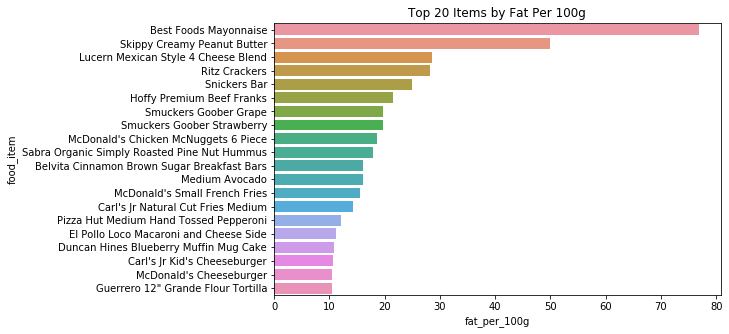

In [16]:
"hide_input"
plt.figure(figsize=(8,5))
sns.barplot(y='food_item',x='fat_per_100g',data=fat_20)
plt.title('Top 20 Items by Fat Per 100g')

Much to my surprise, Best Foods Mayonnaise and Skippy Peanut Butter are considerably high in fat per 100 grams. As someone who frequently consumes both of these products I will definitely have to monitor my intake to avoid having too much fat in my diet.

Another surprise high contender for me is the Ritz Crackers, it's hard to not eat an entire pack of these in one sitting but I might have to reconsider next time a craving hits.

Among the top 20 items for fat per 100 grams, the expected fast food items are there but much lower than some of the household items.

I want to also look at how the fat per 100 grams compares to a single serving since I am curious to see if the same items are as fatty relative to serving size.

In [1]:
"hide_input"
fat_fig = px.scatter(fat,x='serving_measurement_g',y='fat_per_100g',hover_data=['food_item'],
                labels = {'serving_measurement_g':'Single Serving In Grams','fat_per_100g':'Total Fat Per 100 Grams'},
                title='Serving Size vs. Fat Per 100 Grams(Interactive Plot)',
                color='caution',
                color_discrete_map={'No':'Blue','Yes':'Orange'})
fat_fig.show()

NameError: name 'px' is not defined

The above plot compares each item's single serving to its respective total fat per 100 grams. Some takeaways from this plot are:

**Assuming you adhere to proper serving sizes**, Ritz Crackers and the Sabra Hummus are not as fattening as the previous plot might have indicated. Due to each having a small serving size relative to fat per 100 grams, the actual fat per serving becomes relatively small(about 5g each).

Lucerne Cheese Blend is also not as bad as the fat per 100 grams alone might have indicated, however it should still be consumed cautiously since the fat for a single serving is still about.

**THE CAUTION ZONE:**
I am considering the caution zone(for total fat) to be foods that are shown to have high fat content per serving(greater than or equal to 10g). These can easily be identified as the items around the 10g mark for Total Fat Per 100 Grams and 100 gram Serving Size or greater. 

Looking all the way to the right is my go to Rubio's choice, the Ancho Citrus Shrimp Burrito. At about 450 grams for the burrito and 10 grams of fat per 100 grams of serving, this burrito packs a whopping <ins>45 grams of fat</ins>. This is definitely something to take note of as I have never shied away from eating the whole thing in one sitting.

On the opposite side of the graph, but should be noted as well is one of my favorites, Skippy Creamy Peanut Butter. Although its serving size is on the lower end, the high fat per 100 grams reveals a single serving of peanut butter to have about 16 grams of fat. Again, the amount of Peanut Butter I use is something I will have to keep in mind the next I go to make a sandwich.

Other culprits of high fat vary from fast food items like fries to some favorite household foods like tortillas.

I would also like to reiterate, as I likely will in each section, the caution zone is not definitive and does not mean these items have to be exempt from one's diet rather I feel they should be consumed moderately.

## Carbohydrates

For Carbohydrates and Protein I will perform analysis similar to Fats.

In [18]:
"hide_cell"
carbs=df[['food_item','serving_size','serving_measurement_g','total_carbohydrates_g']]

In [19]:
"hide_cell"
carbs.insert(loc=len(carbs.columns),column='carbohydrates_per_100g',value=per_100g(carbs['total_carbohydrates_g']))

In [20]:
"hide_cell"
#create a 'caution' column for foods which contain high fat content
carbs.insert(loc=len(carbs.columns),column='caution',value='No')
for row in carbs.index:
    if carbs.at[row,'total_carbohydrates_g'] >= 44:
        carbs.at[row,'caution'] = 'Yes' 

In [21]:
"hide_cell"
carbs_20 = carbs.nlargest(20,'carbohydrates_per_100g',keep='all')

Text(0.5, 1.0, 'Top 20 Items by Carbohydrates Per 100g')

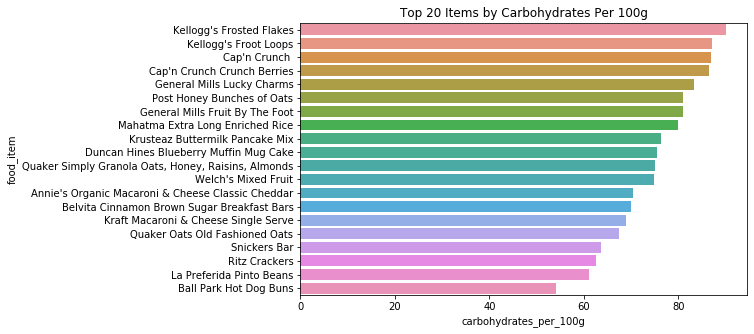

In [22]:
"hide_input"
plt.figure(figsize=(8,5))
sns.barplot(y='food_item',x='carbohydrates_per_100g',data=carbs_20)
plt.title('Top 20 Items by Carbohydrates Per 100g')

Looking at the carbohydrates per 100 gram the main culprits are, for the most part, as expected. A lot of items in this list are grain based products which are known to have a higher carbohydrate content.

The surprise items for this list are the fruit snacks, Fruit By The Foot and Welch's mixed fruit. Being fruit based foods I did not expect these to rank high in carbohydrates.

In [23]:
"hide_input"
carbs_fig = px.scatter(carbs,x='serving_measurement_g',y='carbohydrates_per_100g',hover_data=['food_item'],
                labels = {'serving_measurement_g':'Single Serving In Grams','carbohydrates_per_100g':'Total Carbs Per 100 Grams'},
                title='Serving Size vs. Carbohydrates Per 100 Grams(Interactive Plot)',
                color='caution',
                color_discrete_map={'No':'Blue','Yes':'Orange'})
carbs_fig.show()

The first thing I noted from this visualization is that the Annie's Organic Macaroni and Cheese actually contains more carbs than the Kraft Single Serving. However, the Kraft Macaroni and Cheese does contain more fat so there is the trade-off.

The second, more obvious, thing I noted is how few items there are in the cautious zone for carbohydrates. The criteria for the carb cautious zone was for a single serving to contain <ins>44 grams of carbs or more</ins>.

So despite cereal topping the charts for carbs per 100 grams, **if you adhere to the single serving size** they are actually an adequate source of carbohydrates.



### Sugars

Sugars are actually a form of carbohydrates and contribute to overall carbohydrate intake so for the sake of consistency I will analyze sugar content next.

In [24]:
"hide_cell"
sugars = df[['food_item','serving_size','serving_measurement_g','total_sugars_g','added_sugars_g']]

In [25]:
"hide_cell"
sugars.insert(loc=len(sugars.columns),column='total_sugars_per_100g',value=per_100g(sugars['total_sugars_g']))
sugars.insert(loc=len(sugars.columns),column='added_sugars_per_100g',value=per_100g(sugars['added_sugars_g']))

In [26]:
"hide_cell"
sugars.insert(loc=len(sugars.columns),column='caution',value='No')
for row in sugars.index:
    if sugars.at[row,'total_sugars_g'] >= 9:
        sugars.at[row,'caution'] = 'Yes'

In [27]:
"hide_cell"
sug_20 = sugars.nlargest(20,'total_sugars_per_100g')
add_sug_20 = sugars.nlargest(20,'added_sugars_per_100g')

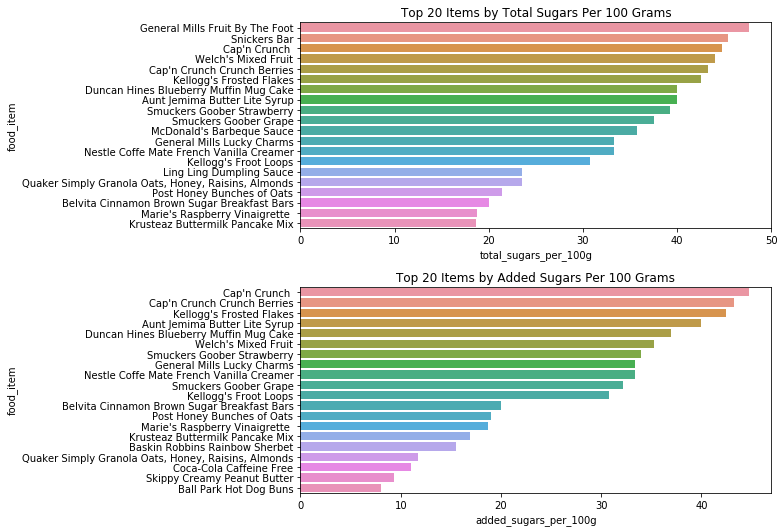

In [28]:
"hide_input"
plt.figure(figsize=(11,7.5))
plt.subplot(211)
sns.barplot(data=sug_20,y='food_item',x='total_sugars_per_100g')
plt.title('Top 20 Items by Total Sugars Per 100 Grams')
plt.subplot(212)
sns.barplot(data=add_sug_20,y='food_item',x='added_sugars_per_100g')
plt.title('Top 20 Items by Added Sugars Per 100 Grams')
plt.tight_layout()

Interestingly enough, there appears to be quite some overlap not only with the total sugars and added sugars items, but with the high carb items as well. This makes sense since sugar content makes up part of the total carbohydrate content, so any item with both high carbohydrates and high sugar could be a potential red flag.

One other thing I find interesting from these charts is the Snickers Candy Bar is second highest in terms of total sugars per 100 grams but does not appear in the top 20 of added sugar per 100 grams. This indicates that in terms of sugar content, a Snickers Bar might actually be better than some other food choices here.

In [29]:
"hide_cell"
caution=sugars[sugars['caution']=='Yes']
no_caution=sugars[sugars['caution']=='No']
added_sugars=sugars[sugars['added_sugars_g']>0]

In [30]:
"hide_input"
sugars_fig = py.subplots.make_subplots(rows=2,cols=1,
                                       subplot_titles=('Total Sugars',
                                                       'Added Sugars'),
                                       vertical_spacing=0.07,
                                       shared_xaxes=True)

sugars_fig.add_trace(go.Scatter(x=no_caution['serving_measurement_g'],y=no_caution['total_sugars_per_100g'],mode='markers',
                                name='Total Sugars',
                                hovertemplate=
                                   'Single Serving in Grams: %{x}'+
                                   '<br>Total Sugars Per 100 Grams: %{y}<br>'+
                                   'Food Item: %{text}',
                                text=no_caution['food_item']),
                    row=1, col=1)
sugars_fig.add_trace(go.Scatter(x=caution['serving_measurement_g'],y=caution['total_sugars_per_100g'],mode='markers',
                                name='Caution',
                                hovertemplate=
                                   'Single Serving in Grams: %{x}'+
                                   '<br>Total Sugars Per 100 Grams: %{y}<br>'+
                                   'Food Item: %{text}',
                                text=caution['food_item']),
                    row=1, col=1)

sugars_fig.add_trace(go.Scatter(x=added_sugars['serving_measurement_g'],
                                y=added_sugars['added_sugars_per_100g'],mode='markers',
                                name='Added Sugars',
                                hovertemplate=
                                   'Single Serving in Grams: %{x}'+
                                   '<br>Added Sugars Per 100 Grams: %{y}<br>'+
                                   'Food Item: %{text}',
                                text=added_sugars['food_item'],
                                marker={'color':'Orange'}),
                    row=2, col=1)

sugars_fig.update_layout(title_text='Serving Size vs. Sugars Per 100 Grams')
sugars_fig.update_xaxes(title_text='Single Serving In Grams',row=2,col=1)
sugars_fig.update_yaxes(title_text='Sugars Per 100 Grams(Interactive Plot)')

sugars_fig.show()

The first graph here displays the <ins>total sugars</ins> per 100 grams versus single serving size in grams with **caution** on any items that contain 9 or more grams of sugar per serving. The second graph contains all of the items which contain <ins>added sugars</ins> and since added sugars generally want to be avoided, this can be considered its own caution zone.

Surprisingly all of the fruit/fruit-based items, except the single clementine, met the criteria for being high in sugar. Although fruits, particularly whole fruits, are generally considered to be essential in a well-balanced diet, those generally consumed in my household are still high in **natural sugar**.

The big culprits from this sugar analysis are cereals. In the previous section I noted how cereal can still be considered an adequate source of carbohydrates but after some further investigation an overwhelming amount of total carbohydrates comes from **added sugar**.

To get a better understanding, below is a plot showing the relationship between food items' carbohydrates content and their added sugar content.


In [49]:
"hide_input"
carbs_sug = px.scatter(df,x='total_carbohydrates_g',y='added_sugars_g' ,hover_data=['food_item'],
                labels = {'total_carbohydrates_g':'Single Serving Carbs(g)','added_sugars_g':'Single Serving Added Sugars(g)'},
                title='Carbohydrate content vs. Added Sugar Content(Interactive Plot)')
carbs_sug.show()
               

The cereals from this data reside in the middle of the plot and it can be seen that added sugar makes up between 1/3 to 1/2 of total carbohydrates for a single serving. Some huge red flags are the Coca-Cola and Aunt Jemima Syrup which both contain 100% of their carbohydrates from added sugars.

The American Heart Association reccomended added sugar intake is no more than 36 grams a day for men and 25 grams for women so it is quite alarming that some of these foods contain half or exceed that amount in just a single serving.<a href="https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/sugar/added-sugars#:~:text=The%20American%20Heart%20Association%20(AHA,day%2C%20or%20about%209%20teaspoons.">[5]</a> 

## Protein

Now for the analysis of protein content. Generally high protein is recommended in a nutritious diet so I will choose to omit a caution zone for the items.

However, it is important to note excess protein can actually be detrimental since excess protein is stored as fats.[[6]](https://www.healthline.com/health/too-much-protein)

In [50]:
"hide_cell"
protein = df[['food_item','serving_size','serving_measurement_g','protein_g']]

In [52]:
"hide_cell"
protein.insert(loc=len(protein.columns),column='protein_per_100g',value=per_100g(protein['protein_g']))

In [56]:
"hide_cell"
protein_20 = protein.nlargest(20,'protein_per_100g',keep='all')

Text(0.5, 1.0, 'Top 20 Items by Protein Per 100g')

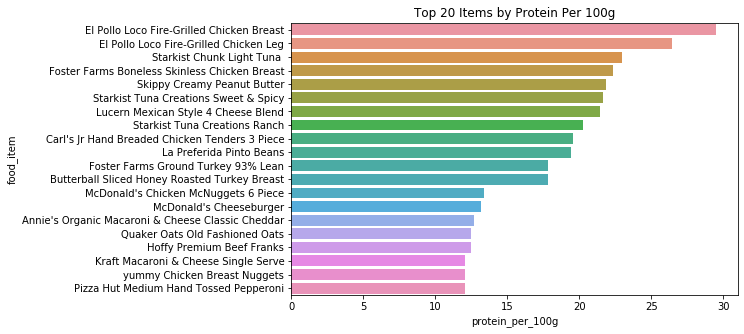

In [63]:
"hide_input"
plt.figure(figsize=(8,5))
sns.barplot(y='food_item',x='protein_per_100g',data=protein_20)
plt.title('Top 20 Items by Protein Per 100g')

In [62]:
"hide_input"
protein_fig = px.scatter(protein,x='serving_measurement_g',y='protein_per_100g',hover_data=['food_item'],
                         labels = {'serving_measurement_g':'Single Serving In Grams','protein_per_100g':'Total Protein Per 100 Grams'},
                         title='Serving Size vs. Protein Per 100 Grams(Interactive Plot)')
protein_fig.show()

There isn't a whole lot of surprise from the protein results but I was surprised to see the El Pollo Loco Chicken Breast to have the highest protein content. I expected either the Foster Farms Chicken Breast or Foster Farms Ground Turkey to contain the most protein.

One other surprise to me is how little protein the Ancho Citrus Burrito has, especially in comparison to the amount of fat and carbohydrates it contains. 

The rest of the high protein items are what I expected being lean meat, fish, or legumes.

## Conclusion

The first thing I conclude from this analysis is that I should definitely reconsider ordering the Ancho Citrus Shrimp Burrito since it does not seem nutritionally worth it to me. Additionally I want to avoid cereal as much as possible due to the high content of added sugar in a single serving alone. 

Overall, anything in excess can be detrimental and moderation is important in sustaining nutrition. No one of the cautious items will destroy nutrition the same as no single non-cautious item will fix nutrition, the critical part is to maintain balance.

### Resources

[1]  A link to an overview provided by USDA for more resources related to macronutrients: 

https://www.nal.usda.gov/fnic/macronutrients 

[2]  A link to to the Dietary Reference Intake for macronutrients(A consensus study publication):

https://www.nap.edu/catalog/10490/dietary-reference-intakes-for-energy-carbohydrate-fiber-fat-fatty-acids-cholesterol-protein-and-amino-acids 

[3]  A link to current USDA dietary guidelines which focus more on substance of foods(vegetables, fruits, etc.) consumed as opposed to simply the macronutrients:

https://health.gov/our-work/food-nutrition/2015-2020-dietary-guidelines

[4]  A link for a macronutrient calculator:

https://www.calculator.net/macro-calculator.html

[5]  A link to an article on sugar intake:

https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/sugar/added-sugars#:~:text=The%20American%20Heart%20Association%20

[6]  A link to an article on protein intake:

https://www.healthline.com/health/too-much-protein